# Import library


In [12]:
import os
import zipfile

# Tentukan dataset Kaggle dan tujuan
dataset_name = "snehilsanyal/construction-site-safety-image-dataset-roboflow"
output_dir = "/content/construction-site-safety-image-dataset-roboflow"

# Unduh dataset
!kaggle datasets download -d {dataset_name} -p /content

# Ekstrak file ZIP ke folder tujuan
zip_file = "/content/construction-site-safety-image-dataset-roboflow.zip"
if os.path.exists(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
    print(f"Dataset berhasil diekstrak ke: {output_dir}")
    # Hapus file ZIP untuk menghemat ruang
    os.remove(zip_file)
else:
    print("File ZIP tidak ditemukan!")


Dataset URL: https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 204M/206M [00:09<00:00, 24.4MB/s]
100% 206M/206M [00:10<00:00, 21.5MB/s]
Dataset berhasil diekstrak ke: /content/construction-site-safety-image-dataset-roboflow


In [18]:
Work_path = '/kaggle/working/'

In [2]:
!git clone https://github.com/ultralytics/ultralytics
# !cd ultralytics/
!pip install -r ultralytics/requirements.txt

Cloning into 'ultralytics'...
remote: Enumerating objects: 50089, done.
remote: Counting objects: 100% (1289/1289), done.
remote: Compressing objects: 100% (670/670), done.
remote: Total 50089 (delta 1083), reused 628 (delta 619), pack-reused 48800 (from 4)
Receiving objects: 100% (50089/50089), 41.63 MiB | 16.40 MiB/s, done.
Resolving deltas: 100% (36681/36681), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'ultralytics/requirements.txt'


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 25.0 MB/s eta 0:00:00


In [13]:
import torch
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

# Load Dataset

# Prepare for Training


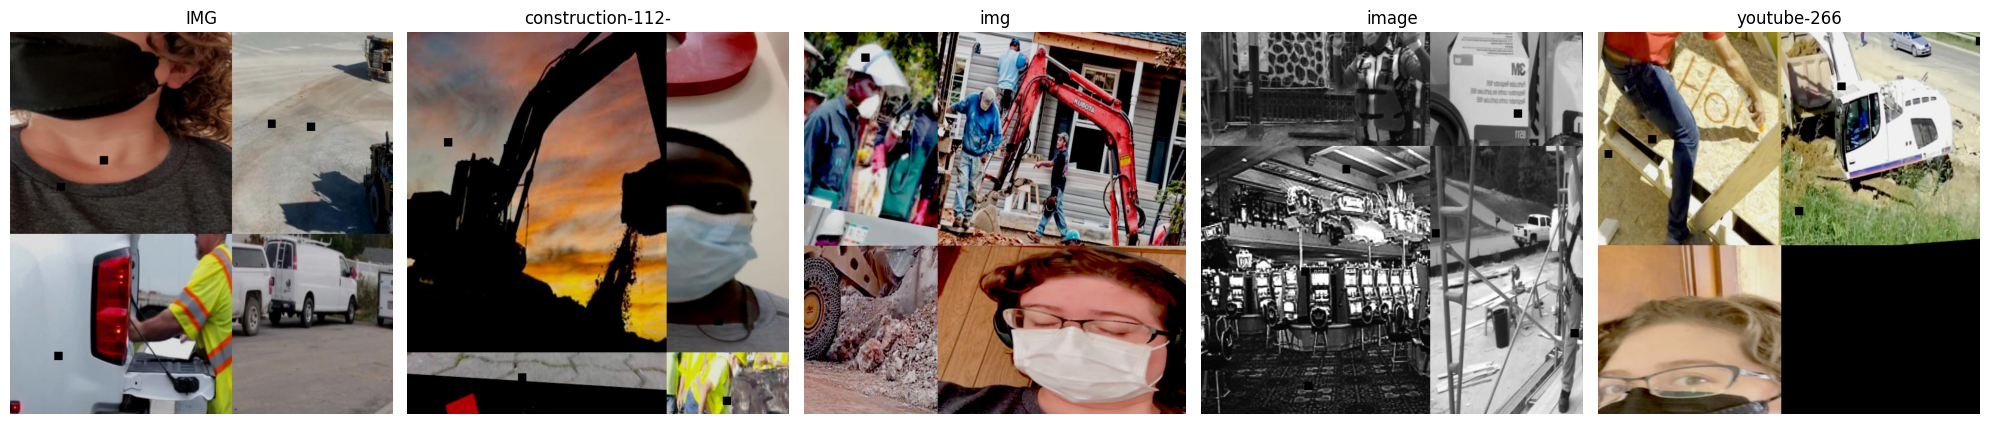

In [14]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Lokasi dataset
dataset_path = '/content/construction-site-safety-image-dataset-roboflow/css-data/train/images'

# Ambil 5 gambar random
num_examples = 5
random_images = random.sample(os.listdir(dataset_path), num_examples)

# Buat plot
fig, axs = plt.subplots(1, num_examples, figsize=(20, 5))

for i, img_name in enumerate(random_images):

  # Buka gambar
  img_path = os.path.join(dataset_path, img_name)
  img = Image.open(img_path)

  # Dapatkan label dari nama file
  label = img_name.split('_')[0]

  # Tampilkan gambar dan label
  axs[i].set_title(label)
  axs[i].imshow(img)
  axs[i].axis(False)

plt.tight_layout()

## Create config.yaml


In [23]:
%%writefile data.yaml
train: /content/construction-site-safety-image-dataset-roboflow/css-data/train/images
val: /content/construction-site-safety-image-dataset-roboflow/css-data/valid/images
test: /content/construction-site-safety-image-dataset-roboflow/css-data/test/images

nc: 10
names: ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

Overwriting data.yaml


In [27]:
from ultralytics import YOLO

# Load the model
model = YOLO('yolov5n.pt')  # load a pretrained model (recommended for training)

# Print the model architecture
print(model)

# LAYERS:
# Conv (x1)
# Conv + C2f (x4) Coba dipotong jadi 2x
# SPPF (x1) Coba untuk dicut, hasilnya gimana?
# Upsample + Concat + C2f (x2) kalo ditambah atau dikurang hasilnya gmna?
# Conv + Concat + C2f (x2)
# Detect

# Full training + hyperparams tuning
# Experiment design

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 270MB/s]

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_st

# Train

In [31]:
!yolo detect train data=/content/data.yaml model=yolov5nu.pt \
  epochs=30 \
  imgsz=640 \
  device=0 \
  name=apd \
  workers=24 \
  lr0=0.001 \
  lrf=0.00286 \
  momentum=0.73375 \
  weight_decay=0.00015 \
  warmup_epochs=1.22935 \
  warmup_momentum=0.1525 \
  box=17 \
  cls=1.32899 \
  dfl=0.56016 \
  optimizer=Adam

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5nu.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=24, project=None, name=apd4, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the paths to the result files
confusion_matrix_path = '/content/runs/detect/apd4/confusion_matrix.png'
F1_curve_path = '/content/runs/detect/apd4/F1_curve.png'
PR_curve_path = '/content/runs/detect/apd4/PR_curve.png'
P_curve_path = '/content/runs/detect/apd4/P_curve.png'
R_curve_path = '/content/runs/detect/apd4/R_curve.png'
results_path = '/content/runs/detect/apd4/results.png'

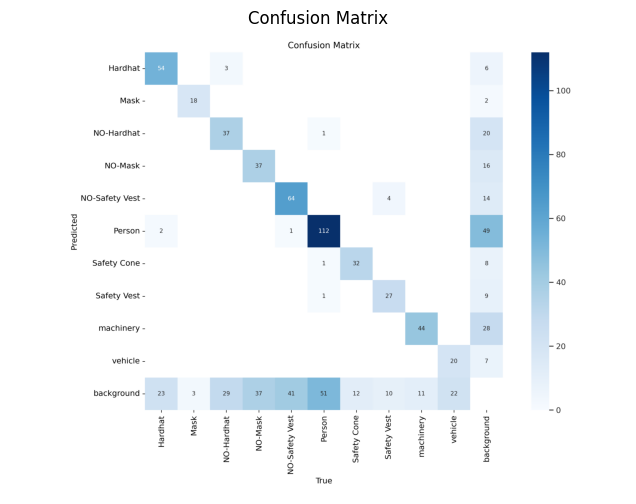

In [35]:
# Display the confusion matrix
confusion_matrix = mpimg.imread(confusion_matrix_path)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

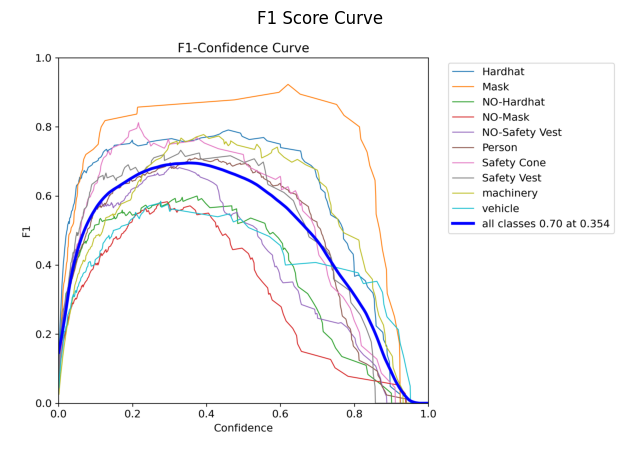

In [36]:
# Display F1 Score Curve
F1_curve = mpimg.imread(F1_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(F1_curve)
plt.title('F1 Score Curve')
plt.axis('off')
plt.show()

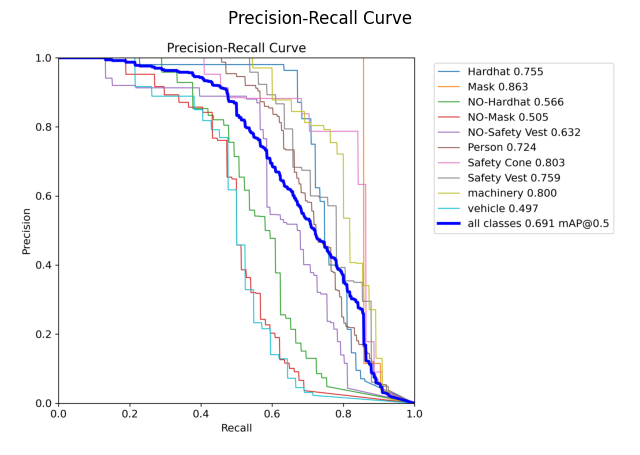

In [37]:
# Display Precision-Recall Curve
PR_curve = mpimg.imread(PR_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(PR_curve)
plt.title('Precision-Recall Curve')
plt.axis('off')
plt.show()

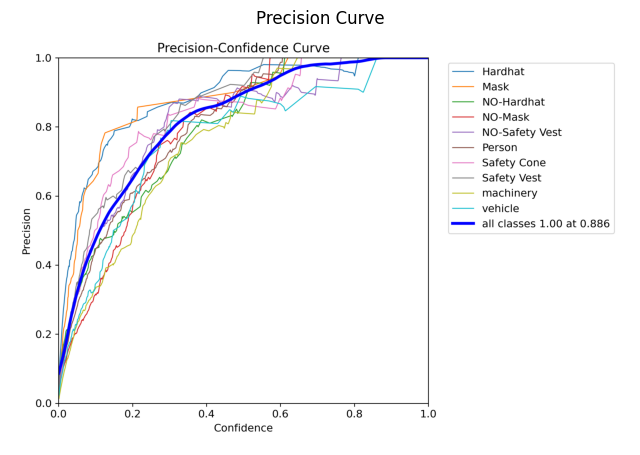

In [38]:
# Display Precision Curve
P_curve = mpimg.imread(P_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(P_curve)
plt.title('Precision Curve')
plt.axis('off')
plt.show()

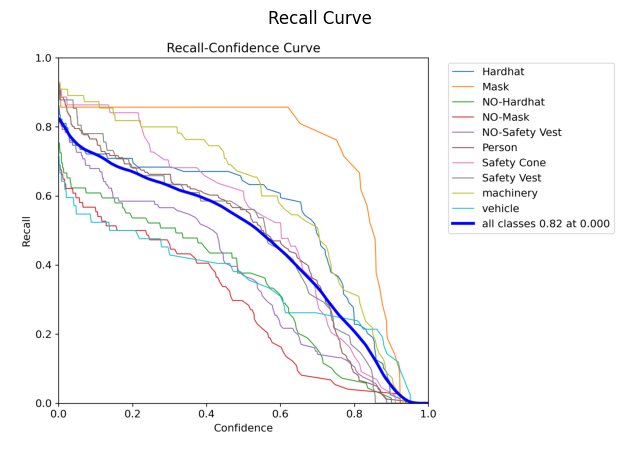

In [39]:
# Display Recall Curve
R_curve = mpimg.imread(R_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(R_curve)
plt.title('Recall Curve')
plt.axis('off')
plt.show()

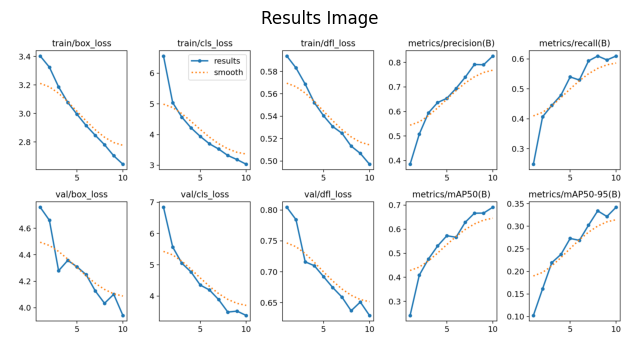

In [40]:
# Display Results Image
results_image = mpimg.imread(results_path)
plt.figure(figsize=(8, 6))
plt.imshow(results_image)
plt.title('Results Image')
plt.axis('off')
plt.show()

# Validation

In [41]:
!yolo detect val model=/content/runs/detect/apd4/weights/best.pt data=data.yaml

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2,504,894 parameters, 0 gradients, 7.1 GFLOPs
val: Scanning /content/construction-site-safety-image-dataset-roboflow/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.62it/s]
                   all        114        697      0.824       0.61      0.688      0.342
               Hardhat         42         79       0.87      0.671      0.755      0.445
                  Mask         19         21      0.879      0.857      0.863      0.418
            NO-Hardhat         37         69      0.758      0.478      0.556      0.239
               NO-Mask         44         74      0.801      0.432      0.494      0.189
        NO-Safety Vest         56        106       0.88      0.551       0.63      0.284
      

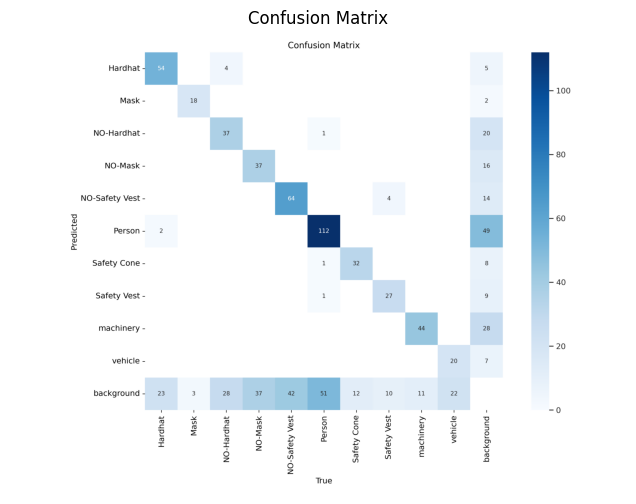

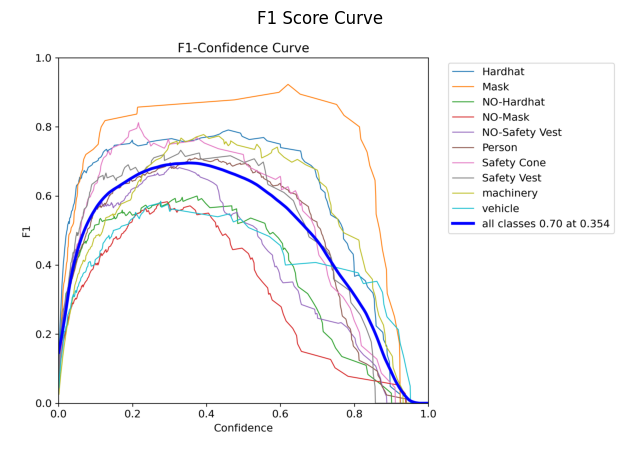

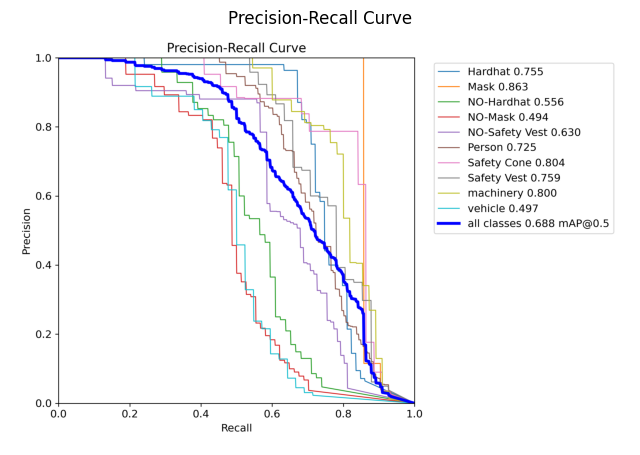

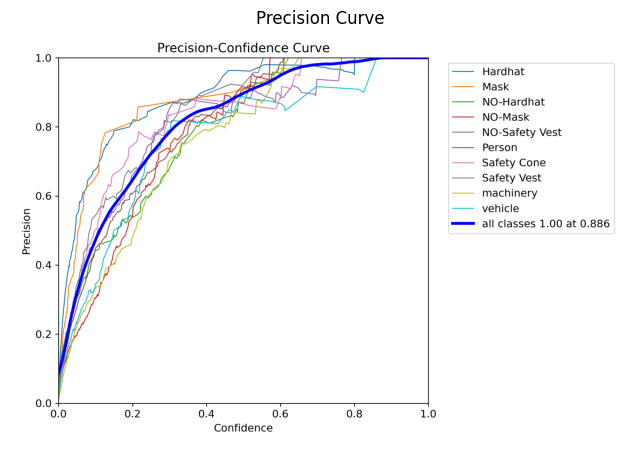

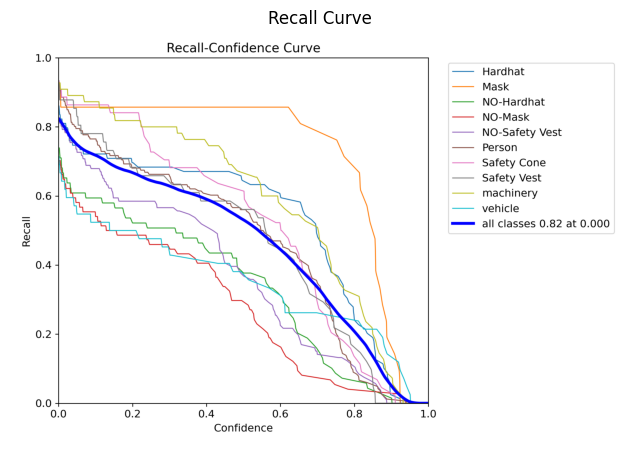

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the paths to the result files
confusion_matrix_path = '/content/runs/detect/val/confusion_matrix.png'
f1_curve_path = '/content/runs/detect/val/F1_curve.png'
PR_curve_path = '/content/runs/detect/val/PR_curve.png'
P_curve_path = '/content/runs/detect/val/P_curve.png'
R_curve_path = '/content/runs/detect/val/R_curve.png'

# Display the confusion matrix
confusion_matrix = mpimg.imread(confusion_matrix_path)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

# Display F1 Score Curve
F1_curve = mpimg.imread(F1_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(F1_curve)
plt.title('F1 Score Curve')
plt.axis('off')
plt.show()

# Display Precision-Recall Curve
PR_curve = mpimg.imread(PR_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(PR_curve)
plt.title('Precision-Recall Curve')
plt.axis('off')
plt.show()

# Display Precision Curve
P_curve = mpimg.imread(P_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(P_curve)
plt.title('Precision Curve')
plt.axis('off')
plt.show()

# Display Recall Curve
R_curve = mpimg.imread(R_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(R_curve)
plt.title('Recall Curve')
plt.axis('off')
plt.show()

# Test

In [43]:
!yolo detect predict model=/content/runs/detect/apd4/weights/best.pt source='/content/construction-site-safety-image-dataset-roboflow/css-data/test/images'

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2,504,894 parameters, 0 gradients, 7.1 GFLOPs

image 1/82 /content/construction-site-safety-image-dataset-roboflow/css-data/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 1 Person, 9.4ms
image 2/82 /content/construction-site-safety-image-dataset-roboflow/css-data/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 2 Hardhats, 1 NO-Mask, 2 Persons, 2 machinerys, 7.2ms
image 3/82 /content/construction-site-safety-image-dataset-roboflow/css-data/test/images/002551_jpg.rf.ce4b9f934161faa72c80dc6898d37b2d.jpg: 640x640 2 Hardhats, 3 NO-Safety Vests, 4 Persons, 1 machinery, 7.2ms
image 4/82 /content/construction-site-safety-image-dataset-roboflow/css-data/test/images/003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg: 640x640 1 Person, 1 Safety Cone, 7.1ms
image 5/82 /content/construction-site-safety-image-dataset-roboflow/css-

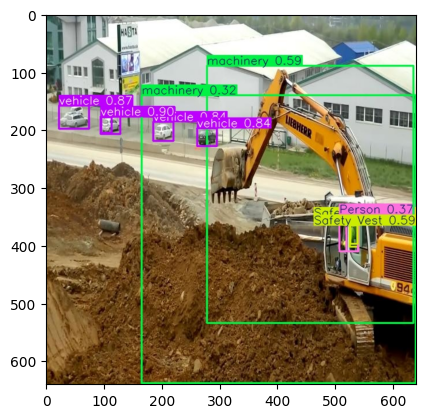

In [61]:
detections_dir = "/content/runs/detect/predict"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))


image 1/1 /content/apd10.jpg: 352x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


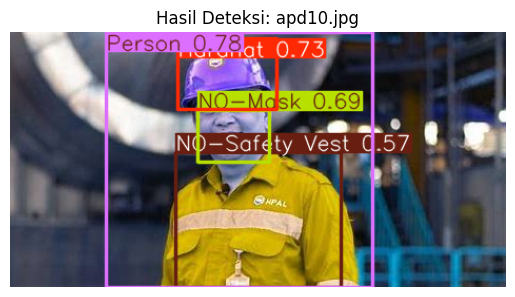

In [69]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

# Path ke model yang sudah terlatih
model_path = "/content/runs/detect/apd4/weights/best.pt"

# Path ke folder data baru
# new_data_path = "/content/apd1.jpg" # This was the issue, pointing to a file, not directory
new_data_path = "/content/"  # Corrected path pointing to a directory

# Inisialisasi model YOLO
model = YOLO(model_path)

# Pastikan folder data baru ada dan berisi gambar
# Include apd1.jpg specifically if that's the only file you want to process
data_files = ['apd10.jpg'] # Include 'apd1.jpg' since it's in the 'new_data_path' directory

# Now, you can process the 'apd1.jpg' file
for img_file in data_files:
    img_path = os.path.join(new_data_path, img_file)

    # Lakukan deteksi
    results = model.predict(source=img_path, save=False, save_txt=False, save_crop=False)

    # Ambil hasil deteksi
    detected_image = results[0].plot()  # Generate image with bounding boxes

    # Tampilkan hasil deteksi
    plt.imshow(detected_image)
    plt.axis('off')
    plt.title(f"Hasil Deteksi: {img_file}")
    plt.show()